In [19]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# basic import 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sys
my_path = r'/home/ilaria/Scrivania/Machine_Learning/Project_1/Project1_ML'
sys.path.insert(0,my_path + r'/code/COMMON')

import numpy as np 
import matplotlib.pyplot as plt
from implementations import *
from proj1_helpers import * 
from outliers import handle_outliers
from labels import idx_2labels
from standard import standardize
from costs import compute_loglikelihood_reg
from sigmoid import * 
from extend_features import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
yb, input_data, ids = load_csv_data(my_path + r'/data/train.csv', sub_sample=False)
print('Data loaded!')
print(input_data.shape)


Data loaded!
(250000, 30)


In [21]:
input_data, Y = handle_outliers(input_data,yb,-999, 'mean') # substiution with mean because the standardization
                                                           #can be affected, otherwise we should delete the whole row
ind_back, ind_sig = idx_2labels(Y, [-1,1])
Y[ind_back] = 0

# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = True
degree = 1
X0, features = extend_features(input_data, names, degree, log)
idx = [1, 13, 4, 11, 46, 0, 44, 7, 12, 42, 49, 2, 16, 10, 43, 47, 45, 22, 6, 23, 19, 48, 21, 5, 8, 29, 32, 31, 30, 33]
X = X0[:,idx]
X.shape

-999 are replaced by the mean value of the feature
---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
Data have been standardized.
---------------------------


(250000, 30)

# Execution time

### Least squares

In [22]:
start_time = datetime.datetime.now()

wls, loss = least_squares(Y,X)

end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print('Least square execution time : ', execution_time, 's')

Least square execution time :  0.033873 s


### Gradient Descent

--------------------- final iteration


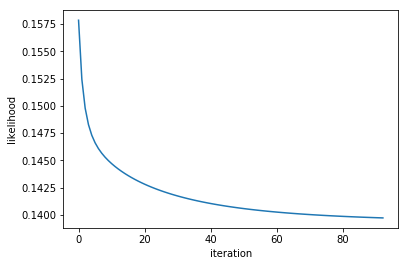

Gradient descent execution time :  1.025094 s
-------------------------------------------------
Loss =  0.139707859218


In [26]:
# hyperparameters
max_iters = 5000
gamma = 1e-1
initial_w = np.zeros(X.shape[1])

start_time = datetime.datetime.now()

w, losses = least_squares_GD(Y, X, initial_w, max_iters, gamma, debug_mode= 1)

end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print('Gradient descent execution time : ', execution_time, 's')
print('-------------------------------------------------')
print('Loss = ',losses[-1])

### Stochastic Gradient Descent

n_iter: 10000 , ||grad|| = 0.234332743124


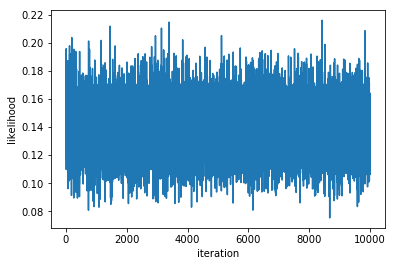

--------------------- final iteration


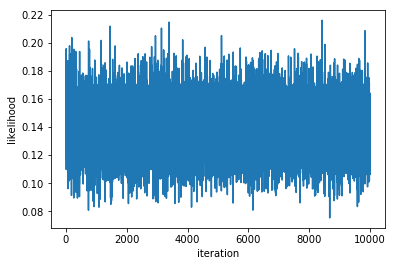

Gradient descent execution time :  844.056446 s
-------------------------------------------------
Loss =  0.142732843501


In [31]:
# hyperparameters
max_iters = 10000
gamma = 1e-3
initial_w = np.zeros(X.shape[1])
batch = 100

start_time = datetime.datetime.now()
w, losses = least_squares_SGD(Y, X, initial_w, max_iters, gamma,batch, debug_mode=1)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print('Gradient descent execution time : ', execution_time, 's')
print('-------------------------------------------------')
print('Loss = ',losses[-1])
